## Salary above 50K prediction and analysis

The dataset there are 2 dataset with train and test data seperately given. we need to create a model that predicts the salary if greater than 50k. It is a classification problem

In [141]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#importing required files
df_test=pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [142]:
df_test.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [144]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [145]:
df_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [146]:
df_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [147]:
final_df=df_train.append(df_test)
final_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1.0
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0.0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1.0
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0.0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0.0


In [148]:
final_df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [149]:
final_df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K         899
dtype: int64

In [150]:
final_df.tail() ##ending of the data. here can observe NaN values due to test dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,NaN
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,NaN
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,NaN
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,NaN
898,37,Local-gov,44694,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,45,United-States,NaN


In [151]:
#df.isnull().sum()

In [152]:
#we can see that there are many null values, let us visualize it
final_df['occupation'].unique()
final_df['workclass'].unique()
final_df['income_>50K'].unique()
final_df['native-country'].unique()
#,'workclass','native-country'

array(['United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
       'Ecuador', 'England', 'Philippines', 'China', 'Germany', nan,
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Taiwan', 'France',
       'Trinadad&Tobago', 'Laos', 'Hungary', 'Honduras', 'Hong',
       'Holand-Netherlands'], dtype=object)

<AxesSubplot:>

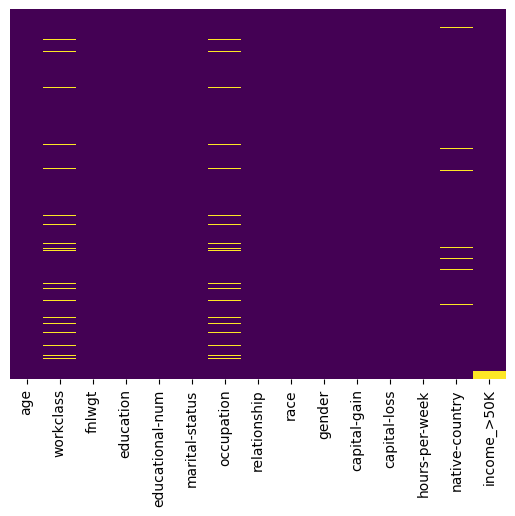

In [153]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

since this is not a reall world problem, we are simply filling the workclass/occupation with data from previou as forward and backward fill

This causes inaccurate results. Since the missing values are comparable and they are not affceting the main salary, we are 

In [154]:
final_df['income_>50K'].fillna(final_df['income_>50K'].ffill(), inplace = True)
final_df['income_>50K']

#this can be backwardfill as well using the below for other values
#final_df['workclass'].bfill()
#final_df['occupation'].bfill()
#final_df['native-country'].bfill()

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
894    0.0
895    0.0
896    0.0
897    0.0
898    0.0
Name: income_>50K, Length: 44856, dtype: float64

<AxesSubplot:>

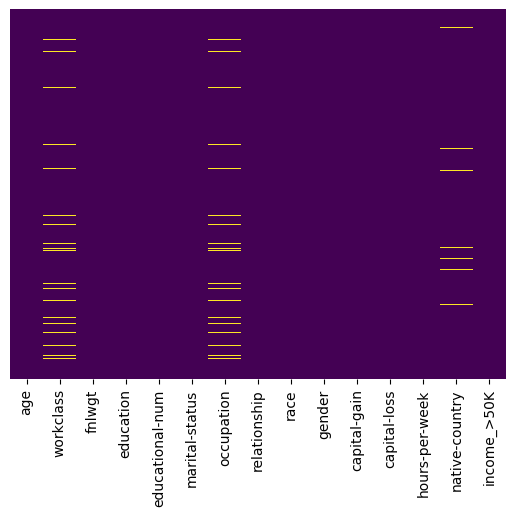

In [155]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [156]:
final_df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [157]:
final_df['workclass'] = final_df['workclass'].astype('category')
final_df['workclass'] = final_df['workclass'].cat.codes
final_df['workclass']


##for null values with categorical data converting the datatype and fill in values of median. here I considered education and education-nuum

0      3
1      3
2      3
3      6
4      6
      ..
894    3
895    3
896    3
897    3
898    1
Name: workclass, Length: 44856, dtype: int8

In [158]:
final_df['workclass'] = final_df['workclass'].fillna(final_df.groupby(['education', 'educational-num'])['workclass'].transform('median'))

In [159]:
final_df['occupation'] = final_df['occupation'].astype('category')
final_df['occupation'] = final_df['occupation'].cat.codes
final_df['occupation']

final_df['occupation'] = final_df['occupation'].fillna(final_df.groupby(['education', 'educational-num'])['occupation'].transform('median'))

In [160]:
final_df['native-country'] = final_df['native-country'].astype('category')
final_df['native-country'] = final_df['native-country'].cat.codes
final_df['native-country']

final_df['native-country'] = final_df['native-country'].fillna(final_df.groupby(['education', 'educational-num'])['native-country'].transform('median'))

In [161]:
final_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [162]:
final_df.groupby(['workclass','native-country']).size().head()

workclass  native-country
-1         -1                39
            0                 2
            1                19
            2                 7
            3                 3
dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

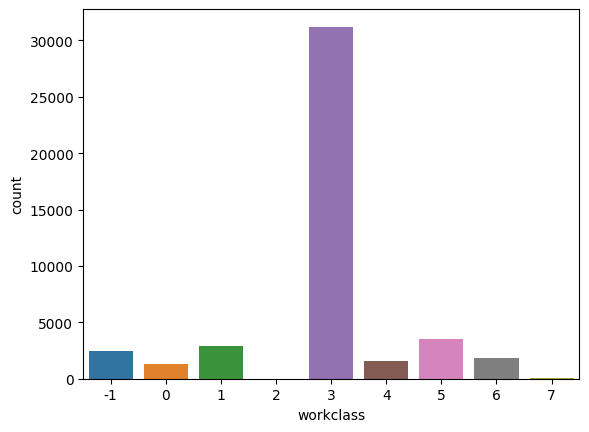

In [163]:
sns.countplot(x="workclass",data=final_df)

<AxesSubplot:xlabel='occupation', ylabel='count'>

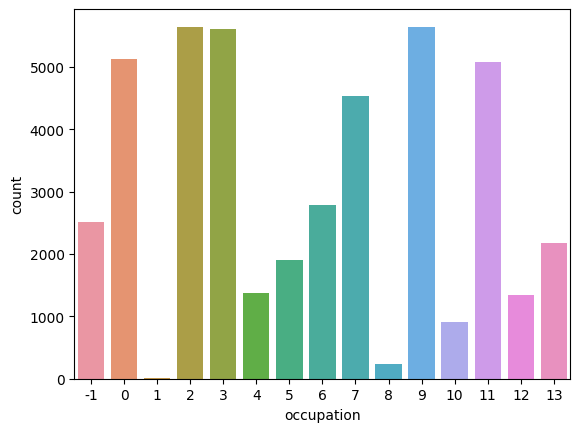

In [164]:
sns.countplot(x="occupation",data=final_df)

In [165]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44856 entries, 0 to 898
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              44856 non-null  int64  
 1   workclass        44856 non-null  int8   
 2   fnlwgt           44856 non-null  int64  
 3   education        44856 non-null  object 
 4   educational-num  44856 non-null  int64  
 5   marital-status   44856 non-null  object 
 6   occupation       44856 non-null  int8   
 7   relationship     44856 non-null  object 
 8   race             44856 non-null  object 
 9   gender           44856 non-null  object 
 10  capital-gain     44856 non-null  int64  
 11  capital-loss     44856 non-null  int64  
 12  hours-per-week   44856 non-null  int64  
 13  native-country   44856 non-null  int8   
 14  income_>50K      44856 non-null  float64
dtypes: float64(1), int64(6), int8(3), object(5)
memory usage: 5.6+ MB


In [166]:
le = LabelEncoder()
  
for col in final_df.columns:
  if final_df[col].dtype == object:
    final_df[col] = le.fit_transform(final_df[col])
  
final_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,3,366425,10,16,0,3,1,4,1,99999,0,60,38,1.0
1,17,3,244602,2,8,4,7,3,4,1,0,0,15,38,0.0
2,31,3,174201,9,13,2,3,0,4,1,0,0,40,38,1.0
3,58,6,110199,5,4,2,13,0,4,1,0,0,40,38,0.0
4,25,6,149248,15,10,4,7,1,2,1,0,0,40,38,0.0


In [167]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44856 entries, 0 to 898
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              44856 non-null  int64  
 1   workclass        44856 non-null  int8   
 2   fnlwgt           44856 non-null  int64  
 3   education        44856 non-null  int32  
 4   educational-num  44856 non-null  int64  
 5   marital-status   44856 non-null  int32  
 6   occupation       44856 non-null  int8   
 7   relationship     44856 non-null  int32  
 8   race             44856 non-null  int32  
 9   gender           44856 non-null  int32  
 10  capital-gain     44856 non-null  int64  
 11  capital-loss     44856 non-null  int64  
 12  hours-per-week   44856 non-null  int64  
 13  native-country   44856 non-null  int8   
 14  income_>50K      44856 non-null  float64
dtypes: float64(1), int32(5), int64(6), int8(3)
memory usage: 4.7 MB


In [168]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Support Vector Machines
from sklearn.svm import LinearSVC

# Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier


In [169]:
#now there are no null values, though data might not be accurate, it provides an estimate
 #lets go into modelling the dataset
    #modelling the dataset
#features
X= final_df.drop('income_>50K', axis=1)
#target
y= final_df['income_>50K']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
X_train.shape, X_test.shape

((35884, 14), (8972, 14))

In [170]:
models = [ LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(),KNeighborsClassifier()]
 

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for i in range(5):
    
    # Fit the classifier
    models[i].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[i].predict(X_test)
    
    # Calculate metrics
    accuracy[i] = accuracy_score(predictions, y_test)
    precision[i] = precision_score(predictions, y_test)
    recall[i] = recall_score(predictions, y_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [172]:
df_model = pd.DataFrame(index=models, columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision  \
LinearSVC()                                         0.792911   0.125652   
DecisionTreeClassifier()                            0.805952   0.608345   
(DecisionTreeClassifier(max_features='auto', ra...  0.857222   0.608819   
GaussianNB()                                        0.797370   0.301091   
KNeighborsClassifier()                              0.780762   0.328592   

                                                      Recall  
LinearSVC()                                         0.949821  
DecisionTreeClassifier()                            0.583712  
(DecisionTreeClassifier(max_features='auto', ra...  0.737931  
GaussianNB()                                        0.648621  
KNeighborsClassifier()                              0.557074